In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix,f1_score,roc_auc_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
credit_data = pd.read_csv('D:\college\study\AI\creditcard.csv')
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#sample data from dataset
credit_data.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
218781,141456.0,1.091963,-1.882198,-1.270329,0.171843,-0.140804,1.426312,-0.155611,0.405343,1.156536,...,-0.078287,-0.903577,0.090691,-1.668159,-0.823177,-0.34182,-0.034634,0.0022,412.98,0


In [5]:
# dataset informations
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking the number of missing values in each column
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Amount'>

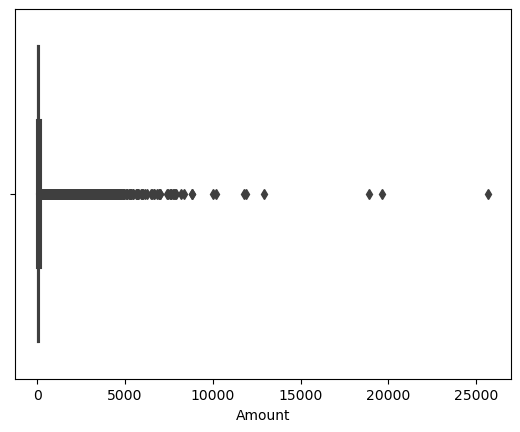

In [8]:
import seaborn as sns
sns.boxplot(x=credit_data['Amount'])

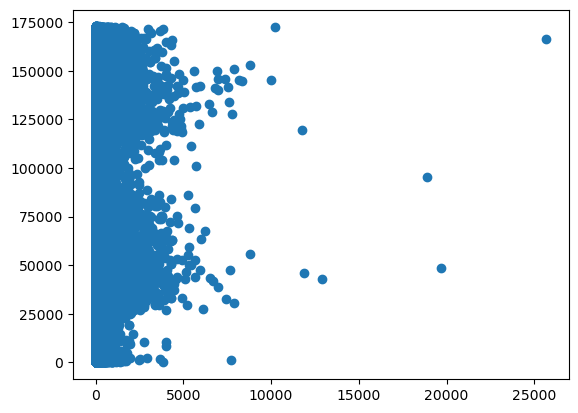

In [9]:
plt.scatter(x=credit_data['Amount'],y=credit_data['Time'])

In [10]:
# distribution of legit transactions & fraudulent transactions
legit = credit_data[credit_data['Class']==0]
fraud = credit_data[credit_data['Class']==1]
print(legit.head())
print(fraud.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [11]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# compare the values for both transactions
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
#sample of legit data 
legit_sample = legit.sample(n=492)

In [15]:
new_df = pd.concat([legit_sample,fraud],axis=0)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
271217,164466.0,-0.401775,-0.483787,1.195887,-2.217340,0.051638,0.312816,-0.434113,0.088091,-2.852514,...,-0.109530,0.044913,-0.355170,0.242206,0.560429,0.120933,0.058330,0.058003,10.00,0
26221,33958.0,-0.746337,-0.406241,1.810383,-0.150500,-0.730995,0.230091,0.208232,0.201147,-0.022282,...,0.230274,0.394804,0.407238,0.081998,-0.744666,0.988448,0.049532,0.166875,180.27,0
63195,50602.0,-1.390635,0.227843,1.664391,-1.755641,-0.793251,-0.923316,-0.117075,0.492733,-1.827200,...,0.074781,-0.243690,0.009104,0.499517,0.297760,-0.581272,0.132460,0.005338,57.00,0
185293,126610.0,0.271531,0.276062,0.195402,-1.573613,-0.107662,-1.155381,0.292537,-0.222503,-0.951144,...,0.182163,0.563054,-0.089366,-0.029637,-0.357233,-0.281287,0.081976,0.069527,12.05,0
242063,151320.0,2.009759,0.018745,-1.633499,0.347498,0.313403,-0.601430,-0.007579,-0.008523,0.397826,...,-0.308754,-0.871606,0.370172,0.578213,-0.366719,0.152176,-0.070767,-0.041890,1.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [16]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [17]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94662.209350,0.029367,-0.001673,-0.016400,0.132249,0.010243,0.034070,0.053306,0.026824,-0.061331,...,0.049171,0.018111,0.037155,-0.005732,-0.029777,0.007346,0.024289,-0.007142,-0.015746,99.603801
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [19]:
#splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [20]:
#creating a model DecisionTreeClassifier


model=DecisionTreeClassifier()
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [21]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction, Y_train)

#precision on training data
train_precision = precision_score(X_train_prediction, Y_train)

#recall on training data
train_recall = recall_score(X_train_prediction, Y_train)

#f1-score on training data 
train_f1score = f1_score(X_train_prediction, Y_train)

#roc auc_score
train_auc = roc_auc_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', train_accuracy)
print('precision on Training data : ', train_precision)
print('recall on Training data : ', train_recall)
print('f1-score on Training data : ', train_f1score)
print('ROC auc score on training data :',train_auc)

Accuracy on Training data :  1.0
precision on Training data :  1.0
recall on Training data :  1.0
f1-score on Training data :  1.0
ROC auc score on training data : 1.0


In [22]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)

#precision on training data
test_precision = precision_score(X_test_prediction, Y_test)

#recall on training data
test_recall = recall_score(X_test_prediction, Y_test)

#f1-score on training data 
test_f1score = f1_score(X_test_prediction, Y_test)

#roc auc_score
test_auc = roc_auc_score(X_test_prediction, Y_test)

print('Accuracy on test data : ', test_accuracy)
print('precision on test data : ', test_precision)
print('recall on test data : ', test_recall)
print('f1-score on test data : ', test_f1score)
print('ROC auc score on test data :',test_auc)

Accuracy on test data :  0.8934010152284264
precision on test data :  0.8673469387755102
recall on test data :  0.9139784946236559
f1-score on test data :  0.8900523560209423
ROC auc score on test data : 0.894489247311828


In [23]:
#creating a model
model=RandomForestClassifier()
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

RandomForestClassifier()

In [24]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, Y_train)

#precision on training data
training_precision = precision_score(X_train_prediction, Y_train)

#recall on training data
training_recall = recall_score(X_train_prediction, Y_train)

#f1-score on training data 
training_f1score = f1_score(X_train_prediction, Y_train)

#roc auc_score
training_auc = roc_auc_score(X_train_prediction, Y_train)


print('Accuracy on Training data : ', training_accuracy)
print('precision on Training data : ', training_precision)
print('recall on Training data : ', training_recall)
print('f1-score on Training data : ', training_f1score)
print('ROC auc score on training data :',training_auc)

Accuracy on Training data :  1.0
precision on Training data :  1.0
recall on Training data :  1.0
f1-score on Training data :  1.0
ROC auc score on training data : 1.0


In [25]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(X_test_prediction, Y_test)

#precision on training data
testing_precision = precision_score(X_test_prediction, Y_test)

#recall on training data
testing_recall = recall_score(X_test_prediction, Y_test)

#f1-score on training data 
testing_f1score = f1_score(X_test_prediction, Y_test)

#roc auc_score
testing_auc = roc_auc_score(X_test_prediction, Y_test)

print('Accuracy on test data : ', testing_accuracy)
print('precision on test data : ', testing_precision)
print('recall on test data : ', testing_recall)
print('f1-score on test data : ', testing_f1score)
print('ROC auc score on test data :',testing_auc)

Accuracy on test data :  0.9238578680203046
precision on test data :  0.8775510204081632
recall on test data :  0.9662921348314607
f1-score on test data :  0.9197860962566844
ROC auc score on test data : 0.9275905118601748


In [26]:
#creating a model

model=LogisticRegression()

In [28]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

C:\Users\pritesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)

#precision on training data
train_data_precision = precision_score(X_train_prediction, Y_train)

#recall on training data
train_data_recall = recall_score(X_train_prediction, Y_train)

#f1-score on training data 
train_data_f1score = f1_score(X_train_prediction, Y_train)

#roc auc_score
train_data_auc = roc_auc_score(X_train_prediction, Y_train)


print('Accuracy on Training data : ', train_data_accuracy)
print('precision on Training data : ', train_data_precision)
print('recall on Training data : ', train_data_recall)
print('f1-score on Training data : ', train_data_f1score)
print('ROC auc score on training data :',train_data_auc)

Accuracy on Training data :  0.940279542566709
precision on Training data :  0.9137055837563451
recall on Training data :  0.9651474530831099
f1-score on Training data :  0.9387222946544981
ROC auc score on training data : 0.9415109246091877


In [30]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

#precision on training data
test_data_precision = precision_score(X_test_prediction, Y_test)

#recall on training data
test_data_recall = recall_score(X_test_prediction, Y_test)

#f1-score on training data 
test_data_f1score = f1_score(X_test_prediction, Y_test)

#roc auc_score
test_data_auc = roc_auc_score(X_test_prediction, Y_test)

print('Accuracy on test data : ', test_data_accuracy)
print('precision on test data : ', test_data_precision)
print('recall on test data : ', test_data_recall)
print('f1-score on test data : ', test_data_f1score)
print('ROC auc score on test data :',test_data_auc)

Accuracy on test data :  0.9187817258883249
precision on test data :  0.8775510204081632
recall on test data :  0.9555555555555556
f1-score on test data :  0.9148936170212767
ROC auc score on test data : 0.9217030114226377


In [28]:
#SVM 

from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=0)  
model.fit(X_train, Y_train)  

SVC(kernel='linear', random_state=0)

In [33]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

#precision on training data
training_data_precision = precision_score(X_train_prediction, Y_train)

#recall on training data
training_data_recall = recall_score(X_train_prediction, Y_train)

#f1-score on training data 
training_data_f1score = f1_score(X_train_prediction, Y_train)

#roc auc_score
training_data_auc = roc_auc_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)
print('precision on Training data : ', training_data_precision)
print('recall on Training data : ', training_data_recall)
print('f1-score on Training data : ', training_data_f1score)
print('ROC auc score on training data :',training_data_auc)

Accuracy on Training data :  0.940279542566709
precision on Training data :  0.9137055837563451
recall on Training data :  0.9651474530831099
f1-score on Training data :  0.9387222946544981
ROC auc score on training data : 0.9415109246091877


In [34]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

#precision on training data
testing_data_precision = precision_score(X_test_prediction, Y_test)

#recall on training data
testing_data_recall = recall_score(X_test_prediction, Y_test)

#f1-score on training data 
testing_data_f1score = f1_score(X_test_prediction, Y_test)

#roc auc_score
testing_data_auc = roc_auc_score(X_test_prediction, Y_test)

print('Accuracy on test data : ', testing_data_accuracy)
print('precision on test data : ', testing_data_precision)
print('recall on test data : ', testing_data_recall)
print('f1-score on test data : ', testing_data_f1score)
print('ROC auc score on test data :',testing_data_auc)

Accuracy on test data :  0.9187817258883249
precision on test data :  0.8775510204081632
recall on test data :  0.9555555555555556
f1-score on test data :  0.9148936170212767
ROC auc score on test data : 0.9217030114226377


In [35]:
print("Training Dataset")


data ={'Name' : ['Accuracy','Precision','Recall','F1-Score','Roc_Auc_score'],
       'DecisionTreeClassificaton' : [train_accuracy ,train_precision ,train_recall, train_f1score, train_auc],
       'Randomforestclassifier' : [training_accuracy ,training_precision ,training_recall, training_f1score, training_auc],
       'LogisticRegression' : [train_data_accuracy ,train_data_precision ,train_data_recall, train_data_f1score, train_data_auc],
        'SVM' : [training_data_accuracy ,training_data_precision ,training_data_recall, training_data_f1score, training_data_auc]}
df = pd.DataFrame(data)
df

Training Dataset


,Name,DecisionTreeClassificaton,Randomforestclassifier,LogisticRegression,SVM
0,Accuracy,1.0,1.0,0.940280,0.940280
1,Precision,1.0,1.0,0.913706,0.913706
2,Recall,1.0,1.0,0.965147,0.965147
3,F1-Score,1.0,1.0,0.938722,0.938722
4,Roc_Auc_score,1.0,1.0,0.941511,0.941511


In [36]:
print("Testing Dataset")


data ={'Name' : ['Accuracy','Precision','Recall','F1-Score','Roc_Auc_score'],
       'DecisionTreeClassificaton' : [test_accuracy ,test_precision ,test_recall, test_f1score, test_auc],
       'Randomforestclassifier' : [testing_accuracy ,testing_precision ,testing_recall, testing_f1score, testing_auc],
       'LogisticRegression' : [test_data_accuracy ,test_data_precision ,test_data_recall, test_data_f1score, test_data_auc],
        'SVM' : [testing_data_accuracy ,testing_data_precision ,testing_data_recall, testing_data_f1score, testing_data_auc]}
df = pd.DataFrame(data)
df

Testing Dataset


,Name,DecisionTreeClassificaton,Randomforestclassifier,LogisticRegression,SVM
0,Accuracy,0.893401,0.923858,0.918782,0.918782
1,Precision,0.867347,0.877551,0.877551,0.877551
2,Recall,0.913978,0.966292,0.955556,0.955556
3,F1-Score,0.890052,0.919786,0.914894,0.914894
4,Roc_Auc_score,0.894489,0.927591,0.921703,0.921703


In [37]:
#ensemble learning

from sklearn.ensemble import BaggingClassifier

In [38]:
estimator_range = [2,4,6,8,10,12,14,16]

In [47]:
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, Y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = Y_test, y_pred = clf.predict(X_test)))

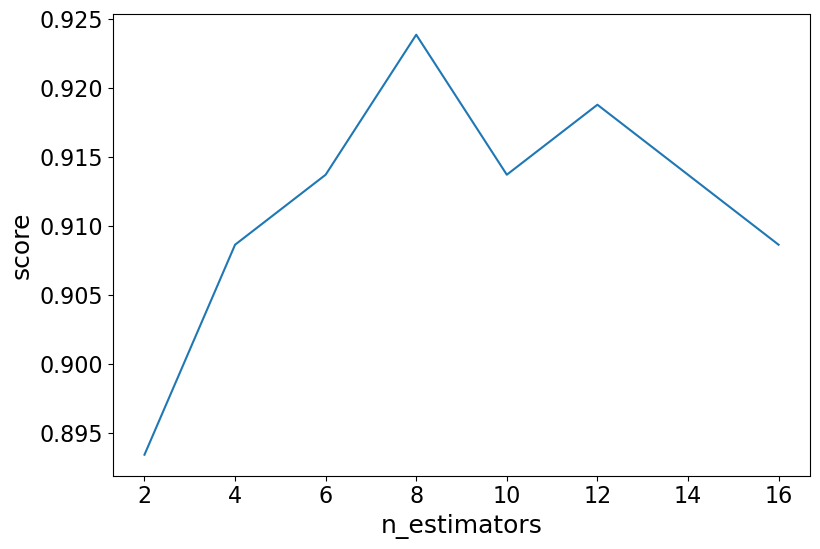

In [48]:
import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()